### 特征工程

#### 1.特征工程概述

什么是特征工程？
<br>特征工程指的是最大程度上从原始数据中汲取特征和信息来使得模型和算法达到尽可能好的效果。
<br>特征工程具体内容包括：
- 数据预处理
- 特征选择
- 特征变换与提取
- 特征组合
- 数据降维


特征工程的两个基本面：
- 基于数理和模型的考虑
- 基于业务的考虑（需要了解数据所属业务领域的专业知识）


几个重要观点：
- 在实际的特征工程实践中，这两个基本面都要考虑，尤其是业务层面，直接关乎到模型的表现。
- 在数据维度特别大、特征数量极多的情况下，找到数据中的 magic feature 至关重要。
- 总之，数据和特征决定了机器学习效果的上限，模型和算法只是不断地逼近这个上限而已。
- kaggle、天池等数据科学竞赛比模型吗？比算法吗？通通不是，比的是特征工程。

#### 2.数据预处理

一些前期的数据清洗和预处理工作，是对原始数据的基本整理和重塑。参看课程第四讲。

#### 3.特征选择

特征选择即选择与目标变量相关的自变量进行用于建模，也叫变量筛选。
<br> 特征选择基于两个基本面：
- 特征是否发散，即该特征对于模型是否有解释力，如果特征是一成不变的（0方差），这样的特征是无用的。
- 特征是否与目标变量有一定的相关性。这一点要充分基于业务层面去考虑。

<br>特征选择柳叶三刀：
- Filter (飞刀)：特征过滤
- Wrapper (弯刀)：特征包装
- Embedded (电刀)：特征嵌入

<br>除了基于pandas和numpy的手动特征选择外，sklearn也有一套特征选择模块。

In [1]:
# 过滤法之方差筛选
from sklearn.feature_selection import VarianceThreshold
X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

第一列值为0的比例超过了80%，在结果中VarianceThreshold剔除这一列

In [2]:
# 过滤法之卡方检验
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
iris = load_iris()
X, y = iris.data, iris.target
X.shape
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
X_new.shape

(150, 2)

通过卡方检验筛选2个最好的特征。

Optimal number of features : 3


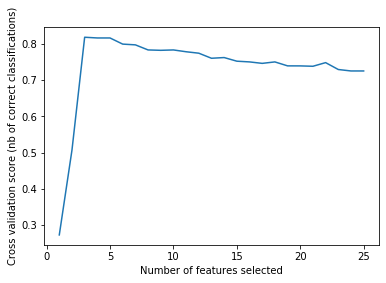

In [4]:
# 包装法
# 选定一些算法，根据算法在数据上的表现来选择特征集合，一般选用的算法包括随机森林、支持向量机和k近邻等常用算法。
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=25, n_informative=3,n_redundant=2, 
                           n_repeated=0, n_classes=8, n_clusters_per_class=1, random_state=0)

svc = SVC(kernel="linear")
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2), scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show();

In [5]:
# 嵌入法之基于惩罚项的特征选择法 
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
iris = load_iris()
X, y = iris.data, iris.target
print('原始数据特征维度：', X.shape)
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
print('l1惩罚处理之后的数据维度：', X_new.shape)

原始数据特征维度： (150, 4)
l1惩罚处理之后的数据维度： (150, 3)


In [6]:
# 嵌入法之基于树模型的特征选择法
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
iris = load_iris()
X, y = iris.data, iris.target
print('原始数据特征维度：', X.shape)
clf = ExtraTreesClassifier()
clf = clf.fit(X, y)
clf.feature_importances_  
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
print('l1惩罚处理之后的数据维度：', X_new.shape)

原始数据特征维度： (150, 4)
l1惩罚处理之后的数据维度： (150, 2)


#### 4.特征变换与特征提取

数据特征逐个处理
- 数据标准化：基于列
- 数据区间缩放
- 数据归一化：基于行
- 数值目标变量对数化处理（有必要的情况下）
- 定量特征二值化（有必要的情况下）
- 定性特征哑编码（one-hot）
- 大文本信息提取（效果类似于one-hot）

In [8]:
# one-hot的两种方法
# sklearn onehotencoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import load_iris
iris = load_iris()
OneHotEncoder().fit_transform(iris.target.reshape((-1,1))).toarray()

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [11]:
# pandas dummies 方法
import pandas as pd
pd.get_dummies(iris.target)

,0,1,2
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0


#### 5.特征组合
在单特征不能取得进一步效果的情况下可尝试不同特征之间的特征组合。
<br>特别需要基于业务考量，而不是随意组合。

#### 6.降维
适用于高维数据，成千上万的特征数量，但一般特征情况下不建议使用。
- PCA
- SVD
- LDA
- t-SNE

#### 7.招聘数据的特征工程探索

In [5]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

In [6]:
lagou_df = pd.read_csv('./lagou_data5.csv', encoding='gbk')
lagou_df.head()

,advantage,city,education,industry,label,position_detail,position_name,salary,size,stage,work_year
0,工作氛围好,成都,本科,O2O,"'年底双薪', '绩效奖金', '岗位晋升', '定期体检'",1、负责新零售业务的数据分析工作，挖掘数据分析需求，制定并实施分析方案，并根据数据分析结果为...,数据分析师,15000,2000人以上,D轮及以上,1-3年
1,"六险二金,晋升通道,独当一面,话语权",北京,本科,移动互联网,"'股票期权', '带薪年假', '绩效奖金', '扁平管理'",方向一、经营分析/指标体系1. 参与公司核心策略的数据分析，基于策略逻辑，建立相关统计模型优...,数据分析师,32500,2000人以上,C轮,5-10年
2,五险一金,北京,不限,移动互联网,"'年底多薪', '岗位晋升', '定期体检', '五险一金'",1、收集、处理用户海量数据，挖掘用户行为特征，为产品、运营提供参考依据；2、针对具体业务问题...,数据分析师,12500,500-2000人,C轮,1-3年
3,"六险一金,周末双休,营养工作餐,萌宠陪伴",广州,大专,移动互联网,"'六险一金', '周末双休', '营养工作餐', '暖心下午茶'",1.负责对业务的专题进行统计分析，形成专题分析报告；2.基于业务理解，设计搭建准确反映业务运...,数据分析师,11500,50-150人,A轮,1-3年
4,爱奇艺,北京,本科,其他,"'绩效奖金', '五险一金', '交通补助', '带薪年假'",1、负责内容合作部产品及运营数据指标的搭建； 2、负责数据后台的完善与优化，确保数据质量；...,数据分析师,10000,2000人以上,上市公司,1-3年


In [7]:
# advantage和label这两个特征作用不大，可在最后剔除
# 分类变量one-hot处理
# pandas one-hot方法
pd.get_dummies(lagou_df['city']).head()

,上海,其他,北京,南京,广州,成都,杭州,武汉,深圳
0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0


In [8]:
# sklearn onehot方法
# 先要硬编码labelcoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
lbl.fit(list(lagou_df['city'].values))
lagou_df['city'] = lbl.transform(list(lagou_df['city'].values))
# 查看硬编码结果
lagou_df['city'].head()

0    5
1    2
2    2
3    4
4    2
Name: city, dtype: int64

In [9]:
# 再由硬编码转为one-hot编码
df_city = OneHotEncoder().fit_transform(lagou_df['city'].values.reshape((-1,1))).toarray()
df_city[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.]])

In [10]:
# 分类特征统一one-hot处理
cat_features = ['city', 'industry', 'education', 'position_name', 'size', 'stage', 'work_year']
for col in cat_features:
    temp = pd.get_dummies(lagou_df[col])
    lagou_df = pd.concat([lagou_df, temp],axis=1)
    lagou_df = lagou_df.drop([col], axis=1)
    
lagou_df.shape

(1650, 54)

In [11]:
pd.options.display.max_columns = 999
lagou_df = lagou_df.drop(['advantage', 'label'], axis=1)
lagou_df.head()

,position_detail,salary,0,1,2,3,4,5,6,7,8,O2O,企业服务,信息安全,其他,医疗健康,教育,数据服务,电子商务,硬件,移动互联网,金融,不限,博士,大专,本科,硕士,数据分析师,数据挖掘工程师,机器学习工程师,深度学习工程师,15-50人,150-500人,2000人以上,50-150人,500-2000人,少于15人,A轮,B轮,C轮,D轮及以上,上市公司,不需要融资,天使轮,未融资,1-3年,10年以上,1年以下,3-5年,5-10年,不限,应届毕业生
0,1、负责新零售业务的数据分析工作，挖掘数据分析需求，制定并实施分析方案，并根据数据分析结果为...,15000,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,方向一、经营分析/指标体系1. 参与公司核心策略的数据分析，基于策略逻辑，建立相关统计模型优...,32500,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,1、收集、处理用户海量数据，挖掘用户行为特征，为产品、运营提供参考依据；2、针对具体业务问题...,12500,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,1.负责对业务的专题进行统计分析，形成专题分析报告；2.基于业务理解，设计搭建准确反映业务运...,11500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1、负责内容合作部产品及运营数据指标的搭建； 2、负责数据后台的完善与优化，确保数据质量；...,10000,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


#### 职位描述特征的信息提取

In [10]:
lagou_df2 = pd.read_csv('./lagou_data5.csv', encoding='gbk')
lagou_df2 = lagou_df2[['position_detail', 'salary']]

In [11]:
# 提取Python信息
for i, j in enumerate(lagou_df2['position_detail']):
    if 'python' in j:
        lagou_df2['position_detail'][i] = j.replace('python', 'Python')

In [15]:
lagou_df2['Python'] = pd.Series()
for i, j in enumerate(lagou_df2['position_detail']):
    if 'Python' in j:
        lagou_df2['Python'][i] = 1
    else:
        lagou_df2['Python'][i] = 0
        
lagou_df2['Python'][:20]

0     1.0
1     1.0
2     1.0
3     0.0
4     0.0
5     1.0
6     0.0
7     0.0
8     1.0
9     0.0
10    1.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    1.0
17    0.0
18    0.0
19    0.0
Name: Python, dtype: float64

In [16]:
lagou_df2['R'] = pd.Series()
for i, j in enumerate(lagou_df2['position_detail']):
    if 'R' in j:
        lagou_df2['R'][i] = 1
    else:
        lagou_df2['R'][i] = 0
        
lagou_df2['R'].value_counts()

0.0    948
1.0    702
Name: R, dtype: int64

In [18]:
for i, j in enumerate(lagou_df2['position_detail']):
    if 'sql' in j:
        lagou_df2['position_detail'][i] = j.replace('sql', 'SQL')

lagou_df2['SQL'] = pd.Series()
for i, j in enumerate(lagou_df2['position_detail']):
    if 'SQL' in j:
        lagou_df2['SQL'][i] = 1
    else:
        lagou_df2['SQL'][i] = 0
        
lagou_df2['SQL'].value_counts()

0.0    1206
1.0     444
Name: SQL, dtype: int64

In [19]:
lagou_df2['Excel'] = pd.Series()
for i, j in enumerate(lagou_df2['position_detail']):
    if 'Excel' in j:
        lagou_df2['Excel'][i] = 1
    else:
        lagou_df2['Excel'][i] = 0
        
lagou_df2['Excel'].value_counts()

0.0    1551
1.0      99
Name: Excel, dtype: int64

In [20]:
lagou_df2['Java'] = pd.Series()
for i, j in enumerate(lagou_df2['position_detail']):
    if 'Java' in j:
        lagou_df2['Java'][i] = 1
    else:
        lagou_df2['Java'][i] = 0
        
lagou_df2['Java'].value_counts()

0.0    1335
1.0     315
Name: Java, dtype: int64

In [21]:
for i, j in enumerate(lagou_df2['position_detail']):
    if 'linux' in j:
        lagou_df2['position_detail'][i] = j.replace('linux', 'Linux')
        
lagou_df2['Linux'] = pd.Series()
for i, j in enumerate(lagou_df2['position_detail']):
    if 'Linux' in j:
        lagou_df2['Linux'][i] = 1
    else:
        lagou_df2['Linux'][i] = 0
        
lagou_df2['Linux'].value_counts()

0.0    1323
1.0     327
Name: Linux, dtype: int64

In [22]:
lagou_df2['C++'] = pd.Series()
for i, j in enumerate(lagou_df2['position_detail']):
    if 'C++' in j:
        lagou_df2['C++'][i] = 1
    else:
        lagou_df2['C++'][i] = 0
        
lagou_df2['C++'].value_counts()

0.0    1165
1.0     485
Name: C++, dtype: int64

In [23]:
for i, j in enumerate(lagou_df2['position_detail']):
    if 'spark' in j:
        lagou_df2['position_detail'][i] = j.replace('spark', 'Spark')

lagou_df2['Spark'] = pd.Series()
for i, j in enumerate(lagou_df2['position_detail']):
    if 'Spark' in j:
        lagou_df2['Spark'][i] = 1
    else:
        lagou_df2['Spark'][i] = 0
        
lagou_df2['Spark'].value_counts()

0.0    1238
1.0     412
Name: Spark, dtype: int64

In [24]:
for i, j in enumerate(lagou_df2['position_detail']):
    if 'tensorflow' in j:
        lagou_df2['position_detail'][i] = j.replace('tensorflow', 'Tensorflow')
        
    if 'TensorFlow' in j:
        lagou_df2['position_detail'][i] = j.replace('TensorFlow', 'Tensorflow')
        
lagou_df2['Tensorflow'] = pd.Series()
for i, j in enumerate(lagou_df2['position_detail']):
    if 'Tensorflow' in j:
        lagou_df2['Tensorflow'][i] = 1
    else:
        lagou_df2['Tensorflow'][i] = 0
        
lagou_df2['Tensorflow'].value_counts()

0.0    1222
1.0     428
Name: Tensorflow, dtype: int64

In [27]:
lagou_df2 = lagou_df2.drop(['position_detail'], axis=1)
lagou_df2.head()

,salary,Python,R,SQL,Excel,Java,Linux,C++,Spark,Tensorflow
0,15000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,32500,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12500,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11500,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,10000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
lagou_df = lagou_df.drop(['position_detail', 'salary'], axis=1)
lagou_df.head()

,0,1,2,3,4,5,6,7,8,O2O,企业服务,信息安全,其他,医疗健康,教育,数据服务,电子商务,硬件,移动互联网,金融,不限,博士,大专,本科,硕士,数据分析师,数据挖掘工程师,机器学习工程师,深度学习工程师,15-50人,150-500人,2000人以上,50-150人,500-2000人,少于15人,A轮,B轮,C轮,D轮及以上,上市公司,不需要融资,天使轮,未融资,1-3年,10年以上,1年以下,3-5年,5-10年,不限,应届毕业生
0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [34]:
lagou = pd.concat((lagou_df2, lagou_df), axis=1).reset_index(drop=True)
lagou.head()

,salary,Python,R,SQL,Excel,Java,Linux,C++,Spark,Tensorflow,0,1,2,3,4,5,6,7,8,O2O,企业服务,信息安全,其他,医疗健康,教育,数据服务,电子商务,硬件,移动互联网,金融,不限,博士,大专,本科,硕士,数据分析师,数据挖掘工程师,机器学习工程师,深度学习工程师,15-50人,150-500人,2000人以上,50-150人,500-2000人,少于15人,A轮,B轮,C轮,D轮及以上,上市公司,不需要融资,天使轮,未融资,1-3年,10年以上,1年以下,3-5年,5-10年,不限,应届毕业生
0,15000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,32500,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,12500,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,11500,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,10000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [36]:
lagou.to_csv('lagou_featured.csv', encoding='gbk')

In [39]:
X = lagou_df.drop(['salary'], axis=1)
y = np.log(lagou_df['salary'].values.reshape((-1, 1)))
print(X.shape, y.shape)

(1650, 50) (1650, 1)


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1155, 50) (1155, 1) (495, 50) (495, 1)


In [41]:
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators = 40, max_depth = 2)
model.fit(X_train, y_train)

D:\Installation\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=40, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [42]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.437189247344084


In [43]:
np.exp(y_pred[:10])

array([26914.05035287, 12705.29848794, 27304.27463346, 27786.03030462,
       18233.40285234, 30891.13552781, 28794.81546759, 13759.45484885,
       23359.94369087, 18009.69350709])

In [45]:
np.exp(y_test[:10])

array([[22500.],
       [10000.],
       [25000.],
       [40000.],
       [13500.],
       [25000.],
       [42500.],
       [ 3500.],
       [30000.],
       [20000.]])